# PHM Article Reproduction

### The main objective is to develop a model based on first two years of dataset (training) and determine the high risk and low risk times of failures for each individual asset for the 3rd year

Training data shows many maintenance activities with 14 different codes. The principle difficulty is to detect the
Preventive Maintenance (PM) in the training data.

3 main steps:

- Recognize Predictive Maintenance pattern based on time and type of maintenance activity via the training data
- Determine the high-risk time intervals based on Predictive Maintenance time by checking the frequency of the failures at specific times between each PM
- Predict the high-risk time intervals in the testing data using the information acquired from the training data (1st and 2nd years)

### Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [2]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [3]:
usage = pd.read_csv("../data/Train - Usage.csv")

usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [4]:
failures = pd.read_csv("../data/Train - Failures.csv")

failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


## Data Preprocessing

In [5]:
indexes = consumption.query("Quantity <= 0 or Quantity >= 50").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(drop=True, inplace=True)

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A174613,0,R707,P097048,1.0
4,A174613,0,R707,P169319,1.0


In [6]:
consumption['Asset'] = consumption['Asset'].str.slice(1,).astype(np.int32)
consumption['Time'] = consumption['Time'].astype(np.int32)
consumption['Reason'] = consumption['Reason'].str.slice(1,).astype(np.int32)
consumption['Part'] = consumption['Part'].str.slice(1,).astype(np.int32)
consumption['Quantity'] = consumption['Quantity'].astype(np.int32)

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,311482,0,417,361646,1
1,174613,0,707,991287,1
2,174613,0,707,169319,1
3,174613,0,707,97048,1
4,174613,0,707,169319,1


In [7]:
usage['Asset'] = usage['Asset'].str.slice(1,).astype(np.int32)
usage['Time'] = usage['Time'].astype(np.int32)
usage['Use'] = usage['Use'].astype(np.float64)

usage.head()

,Asset,Time,Use
0,403193,5,31194.652034
1,403193,17,31223.536355
2,403193,56,31362.706261
3,403193,124,31701.440562
4,403193,144,31724.489666


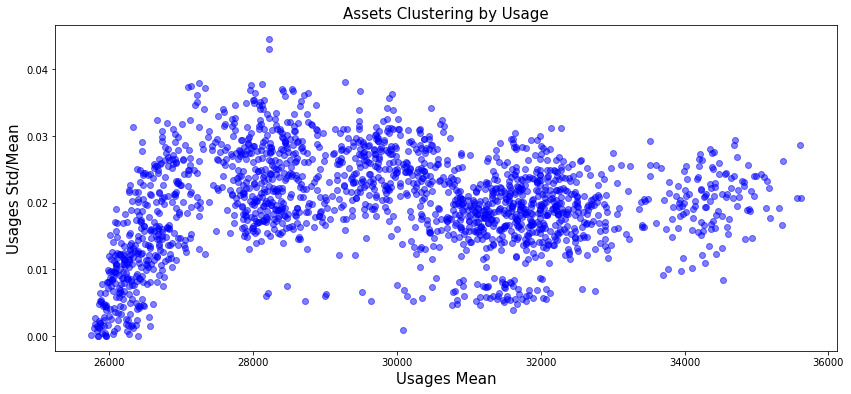

In [8]:
use_group = usage.groupby('Asset')['Use']
asset_group = usage['Asset'].unique()
std_usages = use_group.std().to_numpy()
mean_usages = use_group.mean().to_numpy()

# Outliers removal
for i, mean in enumerate(mean_usages):
    if mean >= 40000:
        mean_usages = np.delete(mean_usages, i)
        std_usages = np.delete(std_usages, i)
        asset_group = np.delete(asset_group, i)

plt.figure(figsize=(14, 6))
plt.plot(mean_usages, std_usages / mean_usages, 'bo', alpha=0.5)
plt.title('Assets Clustering by Usage', fontsize=15)
plt.xlabel('Usages Mean', fontsize=15)
plt.ylabel('Usages Std/Mean', fontsize=15)
plt.show()

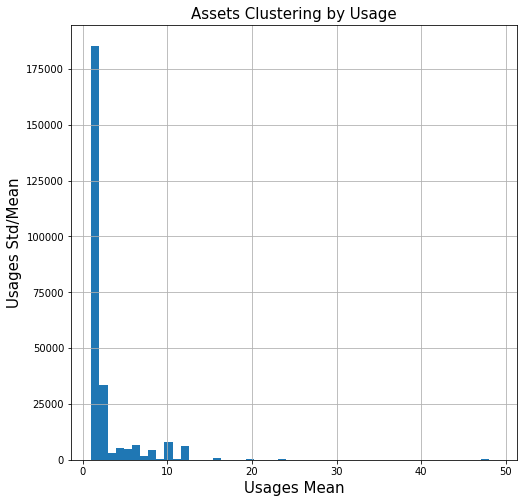

In [14]:
plt.figure(figsize=(8, 8))
plt.hist(consumption["Quantity"], bins=50)
plt.grid()
plt.title('Assets Clustering by Usage', fontsize=15)
plt.xlabel('Usages Mean', fontsize=15)
plt.ylabel('Usages Std/Mean', fontsize=15)
plt.show()